In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail
from matplotlib.patches import Circle, Rectangle, Arc
from nba_api.stats.static import teams
from nba_api.stats.static import players
import requests
import urllib.request
from matplotlib.offsetbox import OffsetImage

In [60]:
player_dic = players.get_players()
Player_id = [player for player in player_dic if player["full_name"]=="Michael Jordan"][0]['id'] # change player's name
print(Player_id)

### if want to get shoot chart in specific year, need to run the following code
 
# team_dict = teams.get_teams()
# Team_id = [team for team in team_dict if team["full_name"]=="Philadelphia 76ers"][0]['id'] # change team's name
# print(Team_id)

# season = "2000-01" # change season

893


[]

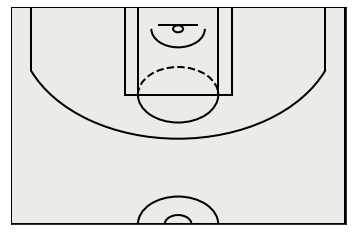

In [61]:
def draw_court(ax=None,color='black', lw=2, background_color="#EBEBE8", outer_lines=False):
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False, zorder=0)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False, zorder=0)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False, zorder=0)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed', zorder=0)
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color, zorder=0)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 138, linewidth=lw,
                               color=color, zorder=0)
    corner_three_b = Rectangle((220, -47.5), 0, 138, linewidth=lw, color=color, zorder=0)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color, zorder=0)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color, zorder=0)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color, zorder=0)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]
    
    # Draw the half court line, baseline and side out bound lines
    outer_lines = Rectangle((-249, -48), 498, 469, linewidth=lw,
                            color=color, fill=None)
    court_elements.append(outer_lines)
    outer_lines_fill = Rectangle((-249, -48), 498, 470, linewidth=lw,
                            color=background_color, fill=True, zorder=-2)
    court_elements.append(outer_lines_fill)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

axs = draw_court(color='black', lw=2, background_color="#EBEBE8", outer_lines=False)
# set the axis range
axs.set_xlim(-250, 250)
axs.set_ylim(422.5, -47.5)
# eliminate axis ticks
axs.set_xticks([])
axs.set_yticks([])

In [62]:
### if want to get shoot chart in specific year, need to run the following code

# Player = ShotChartDetail(team_id=Team_id,player_id=Player_id,season_type_all_star='Regular Season',context_measure_simple='FGA', season_nullable=season)

Player = ShotChartDetail(team_id=0,player_id=Player_id,season_type_all_star='Regular Season',context_measure_simple='FGA')


Player_df = Player.get_data_frames()[0]
Player_df

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0020100002,17,893,Michael Jordan,1610612764,Washington Wizards,1,10,45,...,Right Side(R),8-16 ft.,15,148,34,1,0,20011030,NYK,WAS
1,Shot Chart Detail,0020100002,19,893,Michael Jordan,1610612764,Washington Wizards,1,10,28,...,Center(C),Less Than 8 ft.,0,0,0,1,1,20011030,NYK,WAS
2,Shot Chart Detail,0020100002,26,893,Michael Jordan,1610612764,Washington Wizards,1,9,10,...,Right Side(R),8-16 ft.,14,115,85,1,0,20011030,NYK,WAS
3,Shot Chart Detail,0020100002,34,893,Michael Jordan,1610612764,Washington Wizards,1,8,30,...,Center(C),Less Than 8 ft.,0,0,0,1,0,20011030,NYK,WAS
4,Shot Chart Detail,0020100002,47,893,Michael Jordan,1610612764,Washington Wizards,1,7,15,...,Left Side Center(LC),16-24 ft.,22,-147,169,1,1,20011030,NYK,WAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6631,Shot Chart Detail,0029701177,337,893,Michael Jordan,1610612741,Chicago Bulls,3,0,43,...,Right Side(R),8-16 ft.,14,141,-8,1,0,19980418,CHI,NYK
6632,Shot Chart Detail,0029701177,417,893,Michael Jordan,1610612741,Chicago Bulls,4,4,49,...,Center(C),Less Than 8 ft.,0,0,0,1,1,19980418,CHI,NYK
6633,Shot Chart Detail,0029701177,422,893,Michael Jordan,1610612741,Chicago Bulls,4,4,12,...,Left Side Center(LC),16-24 ft.,16,-121,119,1,0,19980418,CHI,NYK
6634,Shot Chart Detail,0029701177,437,893,Michael Jordan,1610612741,Chicago Bulls,4,3,4,...,Center(C),Less Than 8 ft.,0,0,0,1,1,19980418,CHI,NYK


In [63]:
Player_df["SHOT_MADE_FLAG"].unique()

array([0, 1])

Text(0.5, 1.03, 'Michael Jordan, Career')

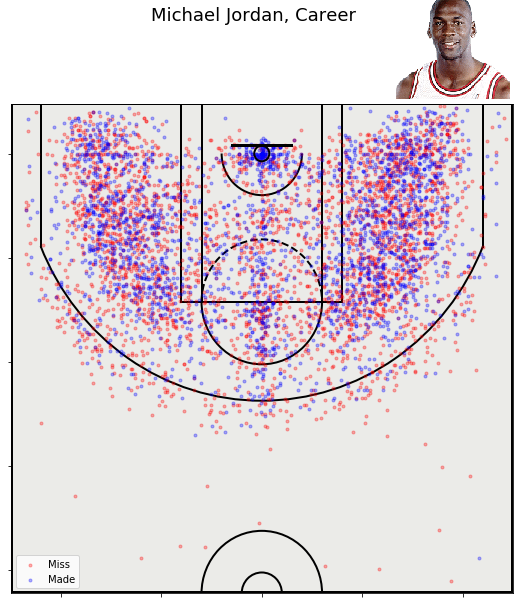

In [64]:
player_id_str = str(Player_id)
pic = urllib.request.urlretrieve("http://stats.nba.com/media/players/230x185/" + player_id_str + ".png")
head_pic = plt.imread(pic[0])

fig = plt.figure(figsize=(9,9))
made = Player_df[Player_df['SHOT_MADE_FLAG']==1]
miss = Player_df[Player_df['SHOT_MADE_FLAG']==0]
l1=plt.scatter(miss.LOC_X, miss.LOC_Y, color='r', marker='.', alpha=0.3)
l2=plt.scatter(made.LOC_X, made.LOC_Y, color='b', marker='.', alpha=0.3)

draw_court()
# set the axis range
plt.xlim(-250,250)
plt.ylim(422.5, -47.5)
# eliminate axis ticks
plt.tick_params(labelbottom=False, labelleft=False)
plt.legend(handles=[l1,l2], labels =['Miss', 'Made'], loc='best')


img = OffsetImage(head_pic, zoom=0.6)
img.set_offset((380,505))
fig.gca().add_artist(img)
name = Player_df.iloc[1]['PLAYER_NAME']

### if want to get shoot chart in specific year, need to run the following code
# fig.suptitle(name + ', ' + season, y=1.03, fontsize=18) 
fig.suptitle(name + ', Career', y=1.03, fontsize=18)